In [48]:
import pandas as pd
%matplotlib inline

In [128]:
data = [
    'FXGD_100101_190816.csv',
    'FXDE_100101_190816.csv',
    'FXIT_100101_190816.csv',
    'FXMM_100101_190816.csv'
]

portfolios = pd.DataFrame([
    [25]*4,
    [100, 0, 0, 0],
    [0, 100, 0, 0],
    [0, 0, 100, 0],
    [0, 0, 0, 100]
])

prices = []
for e in data:
    hist = pd.read_csv(e, sep='\t')
    dt = pd.to_datetime(hist["<DATE>"].astype(str), format='%Y%m%d').rename('date')
    hist = hist.set_index(dt)
    price = ((hist['<CLOSE>'] + hist['<OPEN>']) / 2).rename(e[:4])
    prices.append(price)
    
price_df = pd.DataFrame(prices).T
price_df = price_df[~price_df.isnull().any(axis=1)]

In [163]:
portfolios = pd.DataFrame([
    [.25]*4,
    [1., 0, 0, 0],
    [0, 1., 0, 0],
    [0, 0, 1., 0],
    [0, 0, 0, 1.]
], columns=price_df.columns)
portfolios

,FXGD,FXDE,FXIT,FXMM
0,0.25,0.25,0.25,0.25
1,1.00,0.00,0.00,0.00
2,0.00,1.00,0.00,0.00
3,0.00,0.00,1.00,0.00
4,0.00,0.00,0.00,1.00


In [159]:
pvalue = price_df.dot(portfolios.T)
pvalue = pvalue/pvalue.iloc[0]

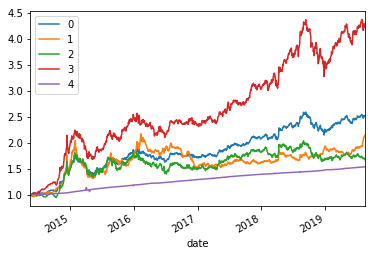

In [161]:
pvalue.plot()